# Import  
파이썬에서 다른 모듈이나 패키지에서 함수, 클래스 등을 가져옵니다.

In [2]:
!pip install koreanize-matplotlib
import koreanize_matplotlib


[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: C:\Users\HOME\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [23]:
import pandas as pd
import numpy as np
import random
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler, MinMaxScaler,StandardScaler
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV

#### 시드(seed) 고정  
매번 고정된 결과를 얻기 위해서 사용합니다.  
시드를 고정하지 않는다면 같은 코드라도 매번 다른 결과가 나올 수 있습니다.

In [4]:
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)

seed_everything(42) # Seed 고정

#### 데이터 읽어오기 및 데이터 확인

In [5]:
# pd.read_csv() 함수를 사용해서 데이터를 읽어오는 코드입니다.
train = pd.read_csv('C:/Users/HOME/Downloads/범죄분류데이터/train.csv')

# 데이터를 확인하기 위해 head() 함수를 사용합니다.
train.head()

,ID,월,요일,시간,소관경찰서,소관지역,사건발생거리,강수량(mm),강설량(mm),적설량(cm),풍향,안개,짙은안개,번개,진눈깨비,서리,연기/연무,눈날림,범죄발생지,TARGET
0,TRAIN_00000,9,화요일,10,137,8.0,2.611124,0.000,0.0,0.0,245.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,차도,2
1,TRAIN_00001,11,화요일,6,438,13.0,3.209093,0.000,0.0,0.0,200.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,차도,0
2,TRAIN_00002,8,일요일,6,1729,47.0,1.619597,0.000,0.0,0.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,인도,1
3,TRAIN_00003,5,월요일,6,2337,53.0,1.921615,11.375,0.0,0.0,225.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,주거지,1
4,TRAIN_00004,9,일요일,11,1439,41.0,1.789721,0.000,0.0,0.0,255.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,주유소,2


#### 독립변수(x_train), 종속변수(y_train)로 분리하기  


In [6]:
x_train = train.drop(['ID', 'TARGET'], axis = 1)
y_train = train['TARGET']


In [7]:
x_train.head()

,월,요일,시간,소관경찰서,소관지역,사건발생거리,강수량(mm),강설량(mm),적설량(cm),풍향,안개,짙은안개,번개,진눈깨비,서리,연기/연무,눈날림,범죄발생지
0,9,화요일,10,137,8.0,2.611124,0.000,0.0,0.0,245.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,차도
1,11,화요일,6,438,13.0,3.209093,0.000,0.0,0.0,200.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,차도
2,8,일요일,6,1729,47.0,1.619597,0.000,0.0,0.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,인도
3,5,월요일,6,2337,53.0,1.921615,11.375,0.0,0.0,225.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,주거지
4,9,일요일,11,1439,41.0,1.789721,0.000,0.0,0.0,255.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,주유소


#### train , validation data 나누기

In [8]:
X_tr, X_val, Y_tr, Y_val = train_test_split(x_train, y_train, test_size=0.3, random_state=42)

#### 라벨인코딩(Label Encoding)

In [9]:

ordinal_features = ['요일', '범죄발생지']

for feature in ordinal_features:
    le = LabelEncoder()

    # Fit and transform on the training data
    le = le.fit(X_tr[feature])
    X_tr[feature] = le.transform(X_tr[feature])

    # Transform the test data (Note: Only transform, do not fit again to avoid data leakage)
    X_val[feature] = le.transform(X_val[feature])



### Bagging - XGBClassifier

In [17]:
# BaggingClassifier 정의 및 학습
base_classifier = XGBClassifier(random_state=42)  # 기본 분류기로 결정 트리를 사용
bagging_classifier = BaggingClassifier(base_classifier, n_estimators=20, random_state=42)
bagging_classifier.fit(X_tr, Y_tr)

y_pred = bagging_classifier.predict(X_val)

#### 예측

정확도 : 0.5527
정말도 : 0.5496
Recall: 0.5527
F1 Score: 0.5417
Confusion Matrix:
[[8024 1361 1534]
 [3016 3442 1184]
 [3194 1038 2529]]


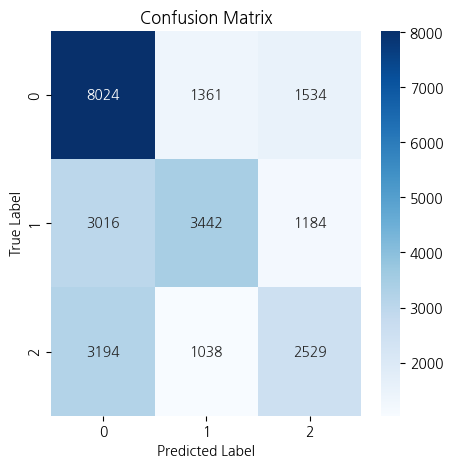

In [18]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

acc=accuracy_score(Y_val,y_pred)
print(f'정확도 : {acc:.4f}')

# 정밀도 (precision)
precision=precision_score(Y_val,y_pred, average='weighted')
print(f'정말도 : {precision:.4f}')

recall = recall_score(Y_val, y_pred, average='weighted')
print(f'Recall: {recall:.4f}')

# F1 점수 (F1 Score)
f1 = f1_score(Y_val, y_pred, average='weighted')
print(f'F1 Score: {f1:.4f}')

# 혼동 행렬 (Confusion Matrix)
conf_matrix = confusion_matrix(Y_val, y_pred)
print('Confusion Matrix:')
print(conf_matrix)


plt.figure(figsize=(5,5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

#### Sampling

##### 오버샘플링

In [12]:
ros=RandomUnderSampler(random_state=42)
x_tr_over,y_tr_over=ros.fit_resample(X_tr,Y_tr)


In [15]:
# BaggingClassifier 정의 및 학습
base_classifier = XGBClassifier(random_state=42)  # 기본 분류기로 결정 트리를 사용
bagging_classifier = BaggingClassifier(base_classifier, n_estimators=20, random_state=42)
bagging_classifier.fit(x_tr_over,y_tr_over)

y_pred = bagging_classifier.predict(X_val)

정확도 : 0.5381
정말도 : 0.5401
Recall: 0.5381
F1 Score: 0.5386
Confusion Matrix:
[[6615 1890 2414]
 [2123 3845 1674]
 [2400 1194 3167]]


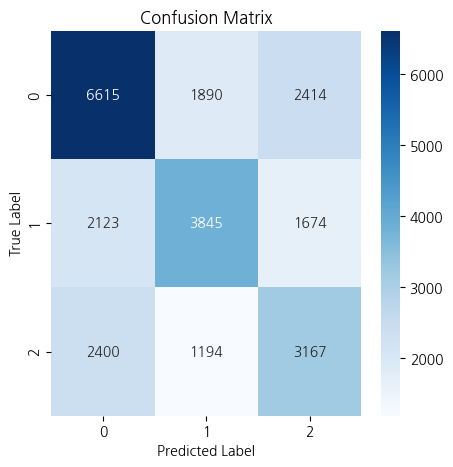

In [16]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

acc=accuracy_score(Y_val,y_pred)
print(f'정확도 : {acc:.4f}')

# 정밀도 (precision)
precision=precision_score(Y_val,y_pred, average='weighted')
print(f'정말도 : {precision:.4f}')

recall = recall_score(Y_val, y_pred, average='weighted')
print(f'Recall: {recall:.4f}')

# F1 점수 (F1 Score)
f1 = f1_score(Y_val, y_pred, average='weighted')
print(f'F1 Score: {f1:.4f}')

# 혼동 행렬 (Confusion Matrix)
conf_matrix = confusion_matrix(Y_val, y_pred)
print('Confusion Matrix:')
print(conf_matrix)


plt.figure(figsize=(5,5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [15]:
# 샘플링 과정이 없던 모델보다 성능이 좋은 것 확인
# 가장 분류가 안되었던 class 3이 이전 모델보다 훨씬 많이 분류되었음

##### SMOTE

In [20]:
smote=SMOTE(random_state=42)
x_tr_smote,y_tr_smote=smote.fit_resample(X_tr,Y_tr)

In [21]:
# BaggingClassifier 정의 및 학습
base_classifier = XGBClassifier(random_state=42)  # 기본 분류기로 결정 트리를 사용
bagging_classifier = BaggingClassifier(base_classifier, n_estimators=20, random_state=42)
bagging_classifier.fit(x_tr_smote,y_tr_smote)

y_pred = bagging_classifier.predict(X_val)

정확도 : 0.5480
정말도 : 0.5446
Recall: 0.5480
F1 Score: 0.5428
Confusion Matrix:
[[7450 1567 1902]
 [2594 3609 1439]
 [2806 1138 2817]]


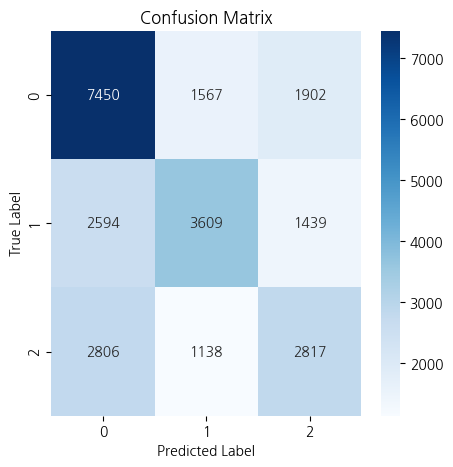

In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

acc=accuracy_score(Y_val,y_pred)
print(f'정확도 : {acc:.4f}')

# 정밀도 (precision)
precision=precision_score(Y_val,y_pred, average='weighted')
print(f'정말도 : {precision:.4f}')

recall = recall_score(Y_val, y_pred, average='weighted')
print(f'Recall: {recall:.4f}')

# F1 점수 (F1 Score)
f1 = f1_score(Y_val, y_pred, average='weighted')
print(f'F1 Score: {f1:.4f}')

# 혼동 행렬 (Confusion Matrix)
conf_matrix = confusion_matrix(Y_val, y_pred)
print('Confusion Matrix:')
print(conf_matrix)


plt.figure(figsize=(5,5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

#### Bagging - CatBoost

In [32]:
class_weights = {0: 1, 1: 1.5, 2: 2}


cat_model = CatBoostClassifier(random_state=42, iterations=300, learning_rate=0.1, verbose=100, class_weights=class_weights)

# BaggingClassifier 정의
bagging_catboost = BaggingClassifier(base_estimator=cat_model, n_estimators=10, random_state=42)

# 모델 학습
bagging_catboost.fit(X_tr,Y_tr)


C:\Users\HOME\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


0:	learn: 1.0827865	total: 15.5ms	remaining: 4.62s
100:	learn: 0.9678223	total: 992ms	remaining: 1.95s
200:	learn: 0.9392424	total: 1.76s	remaining: 870ms
299:	learn: 0.9155244	total: 2.53s	remaining: 0us
0:	learn: 1.0831690	total: 13.8ms	remaining: 4.12s
100:	learn: 0.9692349	total: 806ms	remaining: 1.59s
200:	learn: 0.9415242	total: 1.64s	remaining: 807ms
299:	learn: 0.9183562	total: 2.41s	remaining: 0us
0:	learn: 1.0833609	total: 27ms	remaining: 8.06s
100:	learn: 0.9721935	total: 768ms	remaining: 1.51s
200:	learn: 0.9442267	total: 1.53s	remaining: 752ms
299:	learn: 0.9211658	total: 2.3s	remaining: 0us
0:	learn: 1.0838129	total: 15.8ms	remaining: 4.72s
100:	learn: 0.9711664	total: 784ms	remaining: 1.54s
200:	learn: 0.9411043	total: 1.56s	remaining: 769ms
299:	learn: 0.9172315	total: 2.35s	remaining: 0us
0:	learn: 1.0834245	total: 29.6ms	remaining: 8.85s
100:	learn: 0.9714705	total: 868ms	remaining: 1.71s
200:	learn: 0.9434993	total: 1.65s	remaining: 813ms
299:	learn: 0.9214561	total:

BaggingClassifier(base_estimator=<catboost.core.CatBoostClassifier object at 0x0000017EAD6C5890>,
                  random_state=42)

정확도 : 0.5322
정말도 : 0.5419
Recall: 0.5322
F1 Score: 0.5339
Confusion Matrix:
[[6441 1696 2782]
 [2044 3526 2072]
 [2292  959 3510]]


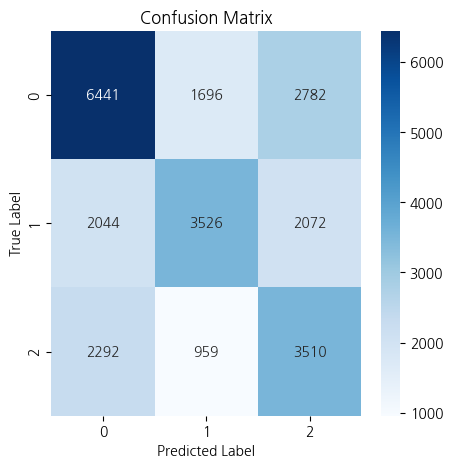

In [33]:
y_pred=bagging_catboost.predict(X_val)
acc=accuracy_score(Y_val,y_pred)
print(f'정확도 : {acc:.4f}')

# 정밀도 (precision)
precision=precision_score(Y_val,y_pred, average='weighted')
print(f'정말도 : {precision:.4f}')

recall = recall_score(Y_val, y_pred, average='weighted')
print(f'Recall: {recall:.4f}')

# F1 점수 (F1 Score)
f1 = f1_score(Y_val, y_pred, average='weighted')
print(f'F1 Score: {f1:.4f}')

# 혼동 행렬 (Confusion Matrix)
conf_matrix = confusion_matrix(Y_val, y_pred)
print('Confusion Matrix:')
print(conf_matrix)


plt.figure(figsize=(5,5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()